# Ghost Rays Analysis
# Wedge Absorber for 10-shell module
## Milo Buitrago-Casas
## May, 2018

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import matplotlib 
from astropy.io import fits
import ast
import matplotlib.patches as patches
import astropy.units as u
import skimage.transform

## Scale

In [128]:
CCD_PIXEL_PITCH = 13.5 * u.micron
binning = 2.
distance = 2. * u.m
s = np.arctan(binning * CCD_PIXEL_PITCH / distance).to(u.arcmin)
resol = 1024
Dwidth=8.25/s.value #detector width in pixels
Flux_X2_low, Flux_X2_up = [], []
Flux_X2N_low, Flux_X2N_up = [], []
power = np.array([0.85,0.65,0.5,0.3,0.1,0.03])/0.03
offaxis = [30.,26.,22.,18.,14.,10.]

### Defining Transparent Color Map:

In [129]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 

### Defining Funtion to get circular mask:

In [130]:
def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

# 30 arcmin

In [131]:
'''Scale and Center Parameters'''
X, Y = 0., -30.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 418, 410 ## Calib Mar 2018
angle0 = 1.0
angle1 = -7.0

## X2 10-Shell Alone

In [132]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym30 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p85mA_0arcminX_-30arcminY.fits')
DX2_X0_Ym30 = np.average(FX2_X0_Ym30[0].data, axis=0)
DX2_X0_Ym30 = skimage.transform.rotate(((DX2_X0_Ym30-X4Darks)/(DX2_X0_Ym30-X4Darks).max()),angle0,center=(X0,Y0))

## X2 10-Shell - Wedge Absorber

In [133]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym30 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells+WedgeAbs/CCD/GhostRays/FOXSI3_X2+WA_CCD_T6Sx6_30kV_0p85mA_0arcminX_-30rcminY.fits')
CD_X0_Ym30 = np.average(CF_Xm0_Ym30[0].data, axis=0)
DX2N_X0_Ym30 = skimage.transform.rotate(((CD_X0_Ym30-DarksC)/(CD_X0_Ym30-DarksC).max()),angle1,center=(X1,Y1))

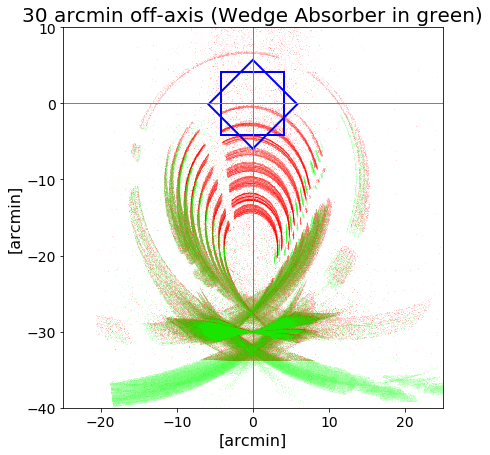

In [134]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym30, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX2N_X0_Ym30, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('30 arcmin off-axis (Wedge Absorber in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)


In [135]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X2_low.append(DX2_X0_Ym30[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X2N_low.append(DX2N_X0_Ym30[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [136]:
# whitout collimator:
h, w = DX2_X0_Ym30.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX2_X0_Ym30.copy()
masked_img[~mask] = 0
Flux_X2_up.append(masked_img.sum())

# with collimator:
h, w = DX2N_X0_Ym30.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX2N_X0_Ym30.copy()
masked_imgC[~maskC] = 0
Flux_X2N_up.append(masked_imgC.sum())

# 26 arcmin

In [137]:
'''Scale and Center Parameters'''
X, Y = 0., -26.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 415, 412 ## Calib Mar 2018
angle0 = 1.0
angle1 = -7.0

## X2 10-Shell Alone

In [138]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym26 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p65mA_0arcminX_-26arcminY.fits')
DX2_X0_Ym26 = np.average(FX2_X0_Ym26[0].data, axis=0)
DX2_X0_Ym26 = skimage.transform.rotate(((DX2_X0_Ym26-X4Darks)/(DX2_X0_Ym26-X4Darks).max()),angle0,center=(X0,Y0))

## X2 10-Shell - Wedge Absorber

In [139]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym26 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells+WedgeAbs/CCD/GhostRays/FOXSI3_X2+WA_CCD_T6Sx6_30kV_0p65mA_0arcminX_-26rcminY.fits')
CD_X0_Ym26 = np.average(CF_Xm0_Ym26[0].data, axis=0)
DX2N_X0_Ym26 = skimage.transform.rotate(((CD_X0_Ym26-DarksC)/(CD_X0_Ym26-DarksC).max()),angle1,center=(X1,Y1))

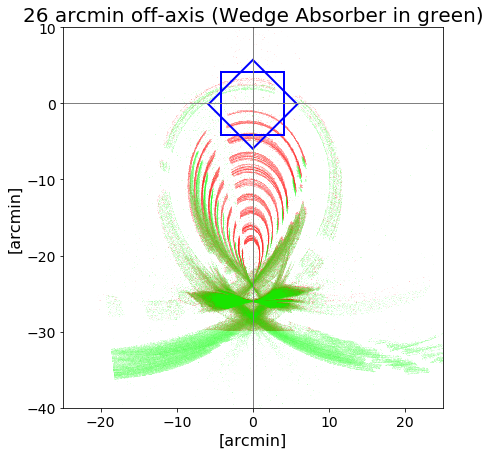

In [140]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym26, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX2N_X0_Ym26, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('26 arcmin off-axis (Wedge Absorber in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)


In [141]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X2_low.append(DX2_X0_Ym26[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X2N_low.append(DX2N_X0_Ym26[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [142]:
# whitout collimator:
h, w = DX2_X0_Ym26.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX2_X0_Ym26.copy()
masked_img[~mask] = 0
Flux_X2_up.append(masked_img.sum())

# with collimator:
h, w = DX2N_X0_Ym26.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX2N_X0_Ym26.copy()
masked_imgC[~maskC] = 0
Flux_X2N_up.append(masked_imgC.sum())

# 22 arcmin

In [143]:
'''Scale and Center Parameters'''
X, Y = 0., -22.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 416, 414 ## Calib Mar 2018
angle0 = 1.0
angle1 = -7.0

## X2 10-Shell Alone

In [144]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym22 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p5mA_0arcminX_-22arcminY.fits')
DX2_X0_Ym22 = np.average(FX2_X0_Ym22[0].data, axis=0)
DX2_X0_Ym22 = skimage.transform.rotate(((DX2_X0_Ym22-X4Darks)/(DX2_X0_Ym22-X4Darks).max()),angle0,center=(X0,Y0))

## X2 10-Shell - Wedge Absorber

In [145]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym22 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells+WedgeAbs/CCD/GhostRays/FOXSI3_X2+WA_CCD_T6Sx6_30kV_0p5mA_0arcminX_-22rcminY.fits')
CD_X0_Ym22 = np.average(CF_Xm0_Ym22[0].data, axis=0)
DX2N_X0_Ym22 = skimage.transform.rotate(((CD_X0_Ym22-DarksC)/(CD_X0_Ym22-DarksC).max()),angle1,center=(X1,Y1))

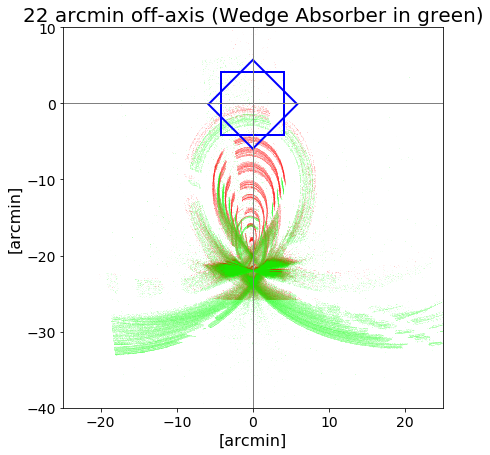

In [146]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym22, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX2N_X0_Ym22, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('22 arcmin off-axis (Wedge Absorber in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)


In [147]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X2_low.append(DX2_X0_Ym22[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X2N_low.append(DX2N_X0_Ym22[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [148]:
# whitout collimator:
h, w = DX2_X0_Ym22.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX2_X0_Ym22.copy()
masked_img[~mask] = 0
Flux_X2_up.append(masked_img.sum())

# with collimator:
h, w = DX2N_X0_Ym22.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX2N_X0_Ym22.copy()
masked_imgC[~maskC] = 0
Flux_X2N_up.append(masked_imgC.sum())

# 18 arcmin

In [149]:
'''Scale and Center Parameters'''
X, Y = 0., -18.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 415, 416 ## Calib Mar 2018
angle0 = 1.0
angle1 = -7.0

## X2 10-Shell Alone

In [150]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym18 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p3mA_0arcminX_-18arcminY.fits')
DX2_X0_Ym18 = np.average(FX2_X0_Ym18[0].data, axis=0)
DX2_X0_Ym18 = skimage.transform.rotate(((DX2_X0_Ym18-X4Darks)/(DX2_X0_Ym18-X4Darks).max()),angle0,center=(X0,Y0))

## X2 10-Shell - Wedge Absorber

In [151]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym18 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells+WedgeAbs/CCD/GhostRays/FOXSI3_X2+WA_CCD_T6Sx6_30kV_0p3mA_0arcminX_-18rcminY.fits')
CD_X0_Ym18 = np.average(CF_Xm0_Ym18[0].data, axis=0)
DX2N_X0_Ym18 = skimage.transform.rotate(((CD_X0_Ym18-DarksC)/(CD_X0_Ym18-DarksC).max()),angle1,center=(X1,Y1))

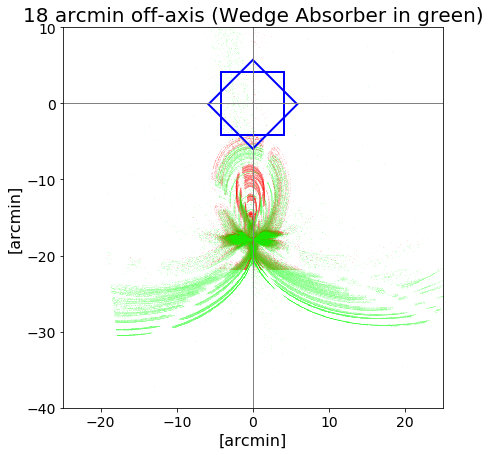

In [152]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym18, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX2N_X0_Ym18, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('18 arcmin off-axis (Wedge Absorber in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)


In [153]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X2_low.append(DX2_X0_Ym18[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X2N_low.append(DX2N_X0_Ym18[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [154]:
# whitout collimator:
h, w = DX2_X0_Ym18.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX2_X0_Ym18.copy()
masked_img[~mask] = 0
Flux_X2_up.append(masked_img.sum())

# with collimator:
h, w = DX2N_X0_Ym18.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX2N_X0_Ym18.copy()
masked_imgC[~maskC] = 0
Flux_X2N_up.append(masked_imgC.sum())

# 14 arcmin

In [155]:
'''Scale and Center Parameters'''
X, Y = 0., -14.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 415, 418 ## Calib Mar 2018
angle0 = 1.0
angle1 = -7.0

## X2 10-Shell Alone

In [156]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym14 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p1mA_0arcminX_-14arcminY.fits')
DX2_X0_Ym14 = np.average(FX2_X0_Ym14[0].data, axis=0)
DX2_X0_Ym14 = skimage.transform.rotate(((DX2_X0_Ym14-X4Darks)/(DX2_X0_Ym14-X4Darks).max()),angle0,center=(X0,Y0))

## X2 10-Shell - Wedge Absorber

In [157]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym14 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells+WedgeAbs/CCD/GhostRays/FOXSI3_X2+WA_CCD_T6Sx6_30kV_0p1mA_0arcminX_-14rcminY.fits')
CD_X0_Ym14 = np.average(CF_Xm0_Ym14[0].data, axis=0)
DX2N_X0_Ym14 = skimage.transform.rotate(((CD_X0_Ym14-DarksC)/(CD_X0_Ym14-DarksC).max()),angle1,center=(X1,Y1))

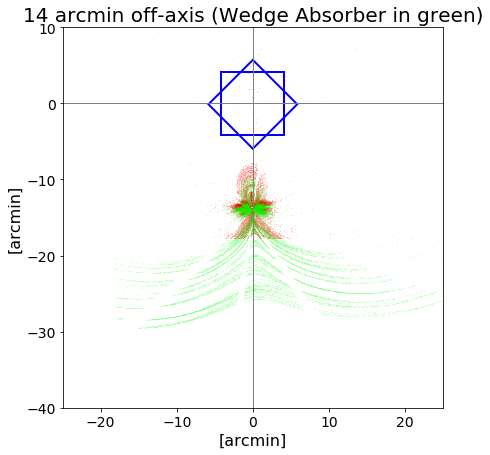

In [158]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym14, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX2N_X0_Ym14, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('14 arcmin off-axis (Wedge Absorber in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)


In [159]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X2_low.append(DX2_X0_Ym14[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X2N_low.append(DX2N_X0_Ym14[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [160]:
# whitout collimator:
h, w = DX2_X0_Ym14.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX2_X0_Ym14.copy()
masked_img[~mask] = 0
Flux_X2_up.append(masked_img.sum())

# with collimator:
h, w = DX2N_X0_Ym14.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX2N_X0_Ym14.copy()
masked_imgC[~maskC] = 0
Flux_X2N_up.append(masked_imgC.sum())

# 10 arcmin

In [161]:
'''Scale and Center Parameters'''
X, Y = 0., -10.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 415, 420 ## Calib Mar 2018
angle0 = 1.0
angle1 = -7.0

## X2 10-Shell Alone

In [162]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym10 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p03mA_0arcminX_-10arcminY.fits')
DX2_X0_Ym10 = np.average(FX2_X0_Ym10[0].data, axis=0)
DX2_X0_Ym10 = skimage.transform.rotate(((DX2_X0_Ym10-X4Darks)/(DX2_X0_Ym10-X4Darks).max()),angle0,center=(X0,Y0))

## X2 10-Shell - Wedge Absorber

In [163]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym10 = fits.open('/Volumes/Storage/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells+WedgeAbs/CCD/GhostRays/FOXSI3_X2+WA_CCD_T6Sx6_30kV_0p03mA_0arcminX_-10rcminY.fits')
CD_X0_Ym10 = np.average(CF_Xm0_Ym10[0].data, axis=0)
DX2N_X0_Ym10 = skimage.transform.rotate(((CD_X0_Ym10-DarksC)/(CD_X0_Ym10-DarksC).max()),angle1,center=(X1,Y1))

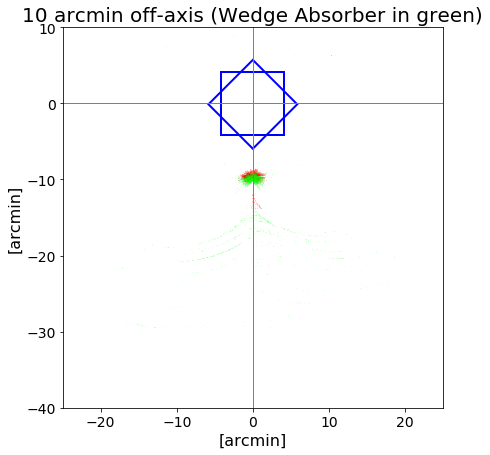

In [164]:
'''Plotting'''
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym10, origin='lower',cmap=tred,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.002,vmax=0.05)

ax.imshow(DX2N_X0_Ym10, origin='lower',cmap=tgreen, 
           norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=0.05)

rect = patches.Rectangle((-4.125,-4.125),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
rect2 = patches.Rectangle((0,-5.955),8.25,8.25,linewidth=2,edgecolor='b',facecolor='none',angle=45)
ax.add_patch(rect2)
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=16)
ax.set_ylabel('[arcmin]',fontsize=16)
ax.set_title('10 arcmin off-axis (Wedge Absorber in green)', fontsize=20)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=1)
ax.axhline(0,color='grey',linewidth=1)


In [165]:
# Squared detector:
CX0, CY0 = int(X0 + abs(X)/s.value), int(Y0 + abs(Y)/s.value)
CX1, CY1 = int(X1 + abs(X)/s.value), int(Y1 + abs(Y)/s.value)
Flux_X2_low.append(DX2_X0_Ym10[CY0-int(Dwidth/2):CY0+int(Dwidth/2),CX0-int(Dwidth/2):CX0+int(Dwidth/2)].sum())
Flux_X2N_low.append(DX2N_X0_Ym10[CY1-int(Dwidth/2):CY1+int(Dwidth/2),CX1-int(Dwidth/2):CX1+int(Dwidth/2)].sum())

In [166]:
# whitout collimator:
h, w = DX2_X0_Ym10.shape[:2]
mask = createCircularMask(h, w,center=[CX0,CY0] ,radius=Dwidth/np.sqrt(2))
masked_img = DX2_X0_Ym10.copy()
masked_img[~mask] = 0
Flux_X2_up.append(masked_img.sum())

# with collimator:
h, w = DX2N_X0_Ym10.shape[:2]
maskC = createCircularMask(h, w,center=[CX1,CY1] ,radius=Dwidth/np.sqrt(2))
masked_imgC = DX2N_X0_Ym10.copy()
masked_imgC[~maskC] = 0
Flux_X2N_up.append(masked_imgC.sum())

# Getting the flux inside the detector

Text(0.5,1,'Ghost Rays X2(10Shell)-Old-Bks vs. X2(10Shell)- Wedege Absorber')

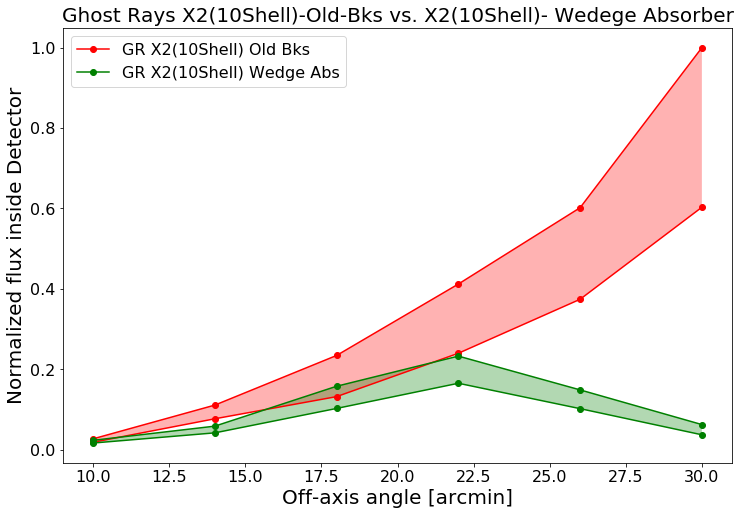

In [175]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,Flux_X2_up/max(Flux_X2_up),'o-',c='r',label='GR X2(10Shell) Old Bks')
plt.fill_between(offaxis,Flux_X2_up/max(Flux_X2_up),Flux_X2_low/max(Flux_X2_up),
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,Flux_X2_low/max(Flux_X2_up),'o-',c='r')
plt.plot(offaxis,Flux_X2N_up/max(Flux_X2_up),'o-',c='g',label='GR X2(10Shell) Wedge Abs')
plt.fill_between(offaxis,Flux_X2N_up/max(Flux_X2_up),Flux_X2N_low/max(Flux_X2_up),
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,Flux_X2N_low/max(Flux_X2_up),'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Normalized flux inside Detector',fontsize=20)
plt.title('Ghost Rays X2(10Shell)-Old-Bks vs. X2(10Shell)- Wedege Absorber',fontsize=20)

# Correcting by the source power:

(-0.1, 6.1)

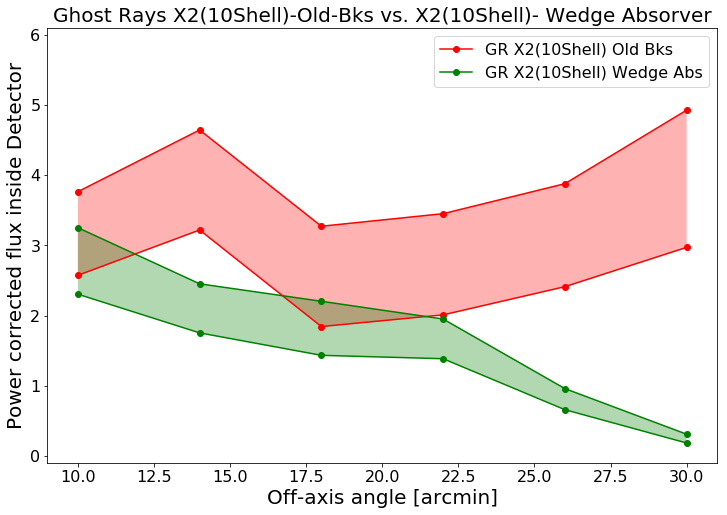

In [176]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,np.array(Flux_X2_up)/power,'o-',c='r',label='GR X2(10Shell) Old Bks')
plt.fill_between(offaxis,np.array(Flux_X2_up)/power,
                 np.array(Flux_X2_low)/power,
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X2_low)/power,'o-',c='r')
plt.plot(offaxis,np.array(Flux_X2N_up)/power,'o-',c='g',label='GR X2(10Shell) Wedge Abs')
plt.fill_between(offaxis,np.array(Flux_X2N_up)/power,
                 np.array(Flux_X2N_low)/power,
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X2N_low)/power,'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Power corrected flux inside Detector',fontsize=20)
plt.title('Ghost Rays X2(10Shell)-Old-Bks vs. X2(10Shell)- Wedge Absorver',fontsize=20)
plt.ylim([-0.1,6.1])

## Same plot but now normalized for each off-axis angle

(-0.05, 1.05)

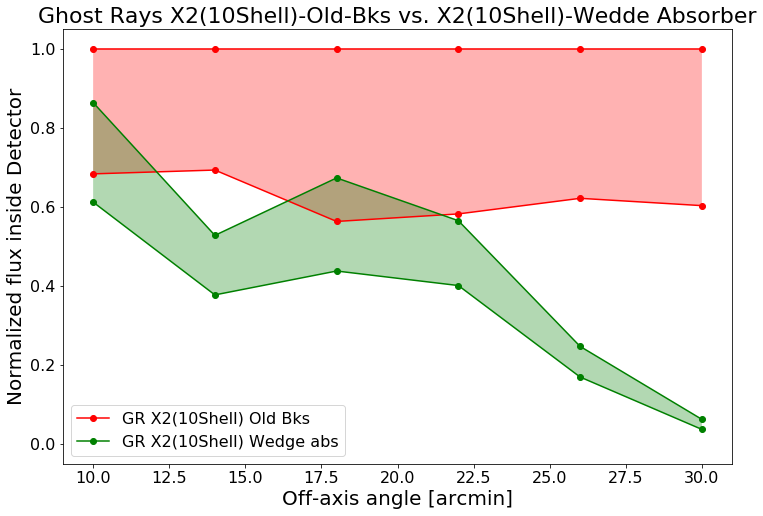

In [178]:
plt.figure(figsize=(12,8))
plt.plot(offaxis,np.array(Flux_X2_up)/np.array(Flux_X2_up),'o-',c='r',label='GR X2(10Shell) Old Bks')
plt.fill_between(offaxis,np.array(Flux_X2_up)/np.array(Flux_X2_up),
                 np.array(Flux_X2_low)/np.array(Flux_X2_up),
                 facecolor='red', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X2_low)/np.array(Flux_X2_up),'o-',c='r')
plt.plot(offaxis,np.array(Flux_X2N_up)/np.array(Flux_X2_up),'o-',c='g',label='GR X2(10Shell) Wedge abs')
plt.fill_between(offaxis,np.array(Flux_X2N_up)/np.array(Flux_X2_up),
                 np.array(Flux_X2N_low)/np.array(Flux_X2_up),
                 facecolor='green', interpolate=True,alpha=0.3)
plt.plot(offaxis,np.array(Flux_X2N_low)/np.array(Flux_X2_up),'o-',c='g')
plt.legend(loc='best',fontsize=16)
plt.tick_params(labelsize=16)
plt.xlabel('Off-axis angle [arcmin]',fontsize=20)
plt.ylabel('Normalized flux inside Detector',fontsize=20)
plt.title('Ghost Rays X2(10Shell)-Old-Bks vs. X2(10Shell)-Wedde Absorber',fontsize=22)
plt.ylim([-0.05,1.05])